# Summary

This experiment compares two randonmness extractors: subsampling and xoring for bits generated by ring oscillators. 

# Data

In [ ]:
# run to install on Colab
!pip install --upgrade pip --quiet
!git clone https://github.com/maciejskorski/deep_correlations_trng.git --quiet
%cd deep_correlations_trng
!pip install . --quiet

In [1]:
try:
    from importlib.resources import files
except:
    from importlib_resources import files
from deep_correlations_trng.utils import read_bits
from deep_correlations_trng import data

from statsmodels.graphics.tsaplots import acf,plot_acf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

data_files = files(data).joinpath('experiment1').rglob('*.bin')
data_files = list(data_files)
data_files

[PosixPath('/Users/maciejskorski/Documents/autocorrelations_trng/src/deep_correlations_trng/data/experiment1/acq_20230118155612_dff.bin'),
 PosixPath('/Users/maciejskorski/Documents/autocorrelations_trng/src/deep_correlations_trng/data/experiment1/acq_20230118155436_dff.bin')]

# Analysis

Let's compare two ways of extracting: by subsampling and by xoring.

/Users/maciejskorski/Documents/autocorrelations_trng/src/deep_correlations_trng/data/experiment1/acq_20230118155612_dff.bin
/Users/maciejskorski/Documents/autocorrelations_trng/src/deep_correlations_trng/data/experiment1/acq_20230118155436_dff.bin


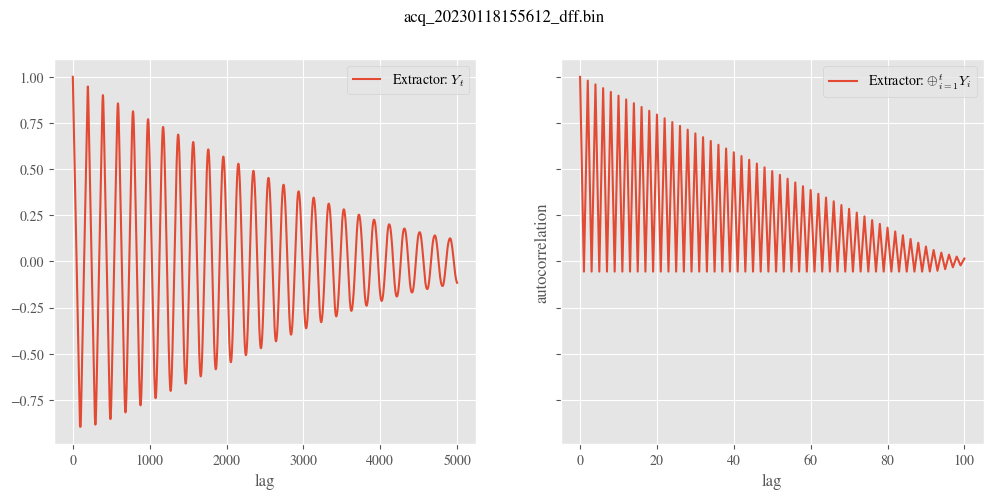

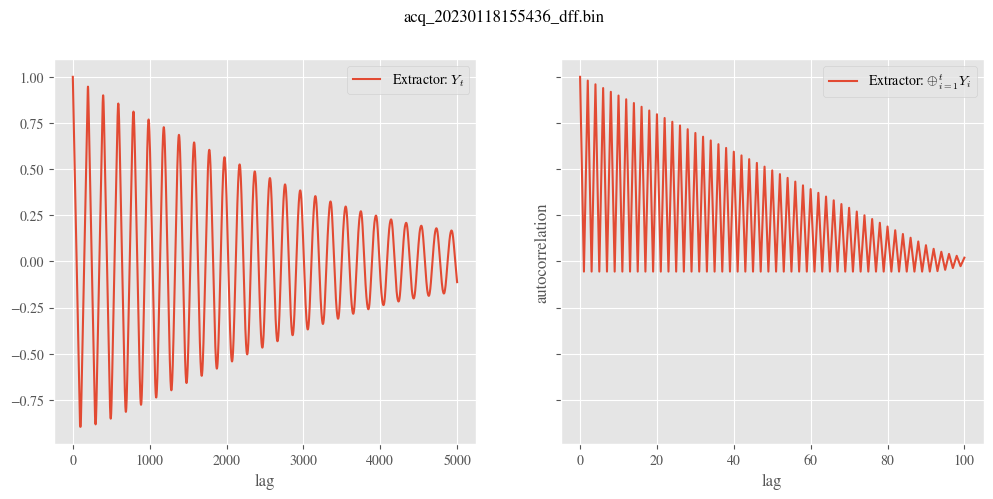

In [2]:
for fname in data_files:
    print(fname)
    bits = read_bits(fname)
    bits = bits[-1000000:]

    fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)

    # subsampling extractor
    ax = axs[0]
    y = bits
    nlags = 5000
    lags = np.arange(nlags+1)
    ax.plot(lags, acf(y,nlags=nlags,fft=True),label=r'Extractor: $Y_t$')
    ax.legend()
    ax.set_xlabel('lag')

    # xoring extractor
    ax = axs[1]
    y = np.cumsum(y)%2
    nlags = 100
    lags = np.arange(nlags+1)
    ax.plot(lags, acf(y,nlags=nlags,fft=True),label=r'Extractor: $\oplus_{i=1}^{t}Y_i$')
    ax.legend()

    ax.set_xlabel('lag')
    ax.set_ylabel('autocorrelation')


    fig.suptitle(f'{fname.name}')
    fig.patch.set_alpha(1.0)

plt.show()

# Conclusions

* We see that the "subsampling" extractor has much longer memory than the "xoring" extractor.
* Can we have a rigrous proof for that?
